In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


In [62]:
travel =  pd.read_excel('TravelFocusGroup.xlsx')

In [63]:
travel.head()

,CustomerID,SaleIndex,Age,cat_Age,Gender,MaritalStatus,MonthlyIncome,cat_Income,NumberOfChildrenVisiting,Passport,Occupation,OwnCar,TypeofContact,Designation,NumberOfFollowups,CityTier,PreferredPropertyStar,ProductPitched,DurationOfPitch,PitchSatisfactionScore
0,200001,6,49,40s,Male,Divorced,20130,20k-25k,2,0,Salaried,1,Company Invited,Manager,4,1,4,Deluxe,14,3
1,200025,10,53,50s,Female,Married,34094,30-35k,1,0,Salaried,0,Self Enquiry,VP,3,1,3,King,11,5
2,200027,2,42,40s,Male,Divorced,21825,20k-25k,1,0,Small Business,0,Self Enquiry,Manager,3,3,4,Deluxe,14,3
3,200029,8,46,40s,Female,Single,33947,30-35k,1,0,Small Business,0,Self Enquiry,VP,3,3,5,King,8,2
4,200031,6,44,40s,Male,Divorced,21465,20k-25k,1,1,Salaried,1,Self Enquiry,Manager,3,1,3,Deluxe,16,3


In [64]:
travel1 = travel.drop('CustomerID', axis=1)

In [65]:
travel2 = travel1.drop('cat_Age', axis=1)

In [66]:
travel3 = travel2.drop('cat_Income', axis=1)

In [67]:
travel3.dropna(inplace=True)

In [68]:
cleanup = {"Gender": {"Male": 1, "Female": 2}, 
            "TypeofContact": {"Self Enquiry": 1,"Company Invited": 2},
            "Occupation": {"Salaried": 1, "Small Business": 2, "Large Business": 3, "Free Lancer": 4},
            "ProductPitched": {"Basic": 1,"Standard": 2, "Deluxe": 3, "Super Deluxe": 4, "King": 5},
            "MaritalStatus": {"Married": 1,"Single": 2,"Divorced": 3, "Unmarried": 4},
            "Designation": {"Manager": 1,"Executive": 2, "Senior Manager": 3, "AVP": 4, "VP": 5}}
travel3.replace(cleanup, inplace=True)

### Convert SaleIndex into Categorical 

In [69]:
bins = [0, 10, 20, 30, 40, 100]

In [70]:
Labels = ['0-10', '11-20','21-30', '31-40', 'Above 40']

In [71]:
travel3['SaleIndexRange'] = pd.cut(travel3.SaleIndex, bins, labels = Labels,include_lowest = True)

In [72]:
travel3['SaleIndexRange'].value_counts()

0-10        1233
11-20        864
21-30        240
31-40         51
Above 40       2
Name: SaleIndexRange, dtype: int64

In [73]:
travel3 = travel3.drop('SaleIndex', axis=1)

In [74]:
travel3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2390 entries, 0 to 2389
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       2390 non-null   int64   
 1   Gender                    2390 non-null   int64   
 2   MaritalStatus             2390 non-null   int64   
 3   MonthlyIncome             2390 non-null   int64   
 4   NumberOfChildrenVisiting  2390 non-null   int64   
 5   Passport                  2390 non-null   int64   
 6   Occupation                2390 non-null   int64   
 7   OwnCar                    2390 non-null   int64   
 8   TypeofContact             2390 non-null   int64   
 9   Designation               2390 non-null   int64   
 10  NumberOfFollowups         2390 non-null   int64   
 11  CityTier                  2390 non-null   int64   
 12  PreferredPropertyStar     2390 non-null   int64   
 13  ProductPitched            2390 non-null   int64 

# Decision Trees

Data Wrangling

In [75]:
x = travel3.drop('SaleIndexRange', axis=1)
y = travel3['SaleIndexRange']

## train test split

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=80)

## Create Initial Decision Tree

In [77]:
decisionTree = DecisionTreeClassifier(random_state=80)
decisionTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=80)

## Assess the Model

In [78]:
treePredictions = decisionTree.predict(x_test)
print(confusion_matrix(y_test, treePredictions))

[[226  95  34   8   1]
 [ 81 158  22   4   0]
 [ 19  21  33   4   0]
 [  4   3   0   4   0]
 [  0   0   0   0   0]]


Interpret result:
Accurate Prediction: 226 of 0-10, 158 of 11-20, 33 of 21-30, 4 of 31-40, 0 of Above 40
Inaccurate Prediction:
    0-10: 81 predicted as 11-20,  19 as 21-30, 4 as 31-40
   11-20: 95 predicted as  0-10,  21 as 21-30, 3 as 31-40
   21-30: 34 predicted as  0-10,  22 as 11-20, 0 as 31-40
   31-40: 08 predicted as  0-10,  04 as 11-20
Above 40: 01 predicted as  0-10

In [79]:
print(classification_report(y_test, treePredictions, zero_division=0))

              precision    recall  f1-score   support

        0-10       0.68      0.62      0.65       364
       11-20       0.57      0.60      0.58       265
       21-30       0.37      0.43      0.40        77
       31-40       0.20      0.36      0.26        11
    Above 40       0.00      0.00      0.00         0

    accuracy                           0.59       717
   macro avg       0.37      0.40      0.38       717
weighted avg       0.60      0.59      0.59       717



Decision Tree model precision score breakdown:
      0-10  68%
     11-20  57%
     21-30  37%
     31-40  20%
  Above 40  0%
  Over all  60%
  

# Random Forest Model

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=80)

## Initial Model

In [81]:
forest = RandomForestClassifier(n_estimators=500, random_state=80)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=80)

## Evaluate Model Fit

In [82]:
forestPredictions = forest.predict(x_test)

In [83]:
print(accuracy_score(y_test, forest.predict(x_test)))

0.6750348675034867


67% overall accuracy

In [84]:
print(classification_report(y_test, forestPredictions, zero_division=0))

              precision    recall  f1-score   support

        0-10       0.68      0.85      0.75       364
       11-20       0.64      0.56      0.60       265
       21-30       0.96      0.31      0.47        77
       31-40       1.00      0.36      0.53        11
    Above 40       0.00      0.00      0.00         0

    accuracy                           0.68       717
   macro avg       0.66      0.42      0.47       717
weighted avg       0.70      0.68      0.66       717



SaleIndex are accurate predicted 68% for 0-10, 64% for 11-20, 96% for 21-30, 100% for 31-40, 0% for Above 40.  Over all accuracy is 70%

# Hyperparameter Tuning 

## Number of Estimators

In [85]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result) 
    print(n, ':', result)

1 : 0.4825662482566248
4 : 0.5885634588563459
5 : 0.599721059972106
8 : 0.6331938633193863
10 : 0.6457461645746164
20 : 0.6638772663877266
50 : 0.6694560669456067
75 : 0.6778242677824268
100 : 0.6750348675034867
250 : 0.6722454672245467
500 : 0.6847977684797768


So it looks like the best accuracy arises when you use only 75 trees instead of the standard 500!

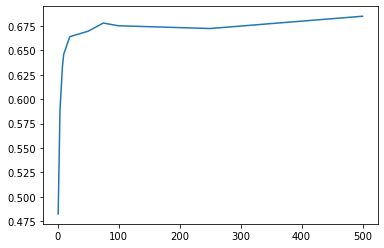

In [86]:
plt.plot(n_estimators_array, results)

## Tuning the Remaining Three

In [87]:
# Number of features to consider at every split
max_features = ['auto', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['auto', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [88]:
rf = RandomForestClassifier(n_estimators=75)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3, random_state=42)

In [94]:
rf_random.fit(x_train, y_train)

C:\Users\dollp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=75),
                   n_iter=90,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['auto', None, 'log2'],
                                        'min_samples_leaf': [1, 2, 4]},
                   random_state=42)

In [95]:
rf_random.best_params_


{'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30}

In [96]:
forest = RandomForestClassifier(n_estimators=10, min_samples_leaf=1, max_features="auto", max_depth=30)
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=10)

In [97]:
forestPredictionsTuning = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictionsTuning))

[[283  76   4   0   1]
 [131 129   4   1   0]
 [ 32  20  25   0   0]
 [  4   4   0   3   0]
 [  0   0   0   0   0]]


In [98]:
print(classification_report(y_test, forestPredictionsTuning))

              precision    recall  f1-score   support

        0-10       0.63      0.78      0.70       364
       11-20       0.56      0.49      0.52       265
       21-30       0.76      0.32      0.45        77
       31-40       0.75      0.27      0.40        11
    Above 40       0.00      0.00      0.00         0

    accuracy                           0.61       717
   macro avg       0.54      0.37      0.41       717
weighted avg       0.62      0.61      0.60       717



C:\Users\dollp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dollp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dollp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision score for sale Index are as 68% for 0-10, 66% for 11-20, 96% for 21-30, 100% for 31-40, over all 71% accuracy. 